<a href="https://colab.research.google.com/github/gu1lleom/Colab-Clases/blob/main/DM_Clase_01_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

# Lectura de datos

In [ ]:
df_entrenamiento = pd.read_excel('/content/udemy_entrenamiento.xlsx', index_col="id", parse_dates=['created_date'])
df_entrenamiento['bestseller'] = df_entrenamiento['bestseller'].map({'yes': 'si', 'no': 'no'})
df_entrenamiento.head()

In [ ]:
df_prueba = pd.read_excel('/content/udemy_prueba.xlsx', index_col="id")
df_prueba.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
11088,Desarrolla Juegos 2D en Unity hasta publicarlo...,Juegos 2d todo lo necesario para crear un jueg...,False,NaN,es_ES,5.000000,21,0,es_ES,2021-03-01,Principiante,2021-03-21,2021-03-04,4 horas,116249520,Informática y software,Desarrollo de juegos para móviles,Aprenderás todos los conceptos básicos para u...,$19.99,$12
11089,React Native: Aplicaciones nativas para IOS y ...,"TypeScript, React Native CLI, Google y Apple m...",False,NaN,es_LA,4.878622,380,0,es_LA,2021-03-01,Todos los niveles,2021-04-04,2021-06-14,"43,5 horas",11767934,Desarrollo,API de Google Maps,React Native.Crear aplicaciones móviles nativa...,$89.99,$12
11090,Introducción a Internet de las cosas con Micro...,Aprende como ingresar al mundo del Internet de...,False,NaN,es_ES,4.451706,32,0,es_ES,2021-03-01,Principiante,2021-04-06,2021-05-27,"1,5 horas",136827143,Informática y software,MicroPython,Controlar módulos ESP32 usando el lenguaje de ...,$34.99,$12
11091,Identifica y construye a tu cliente ideal,Construir las bases sólidas del perfil de clie...,False,NaN,es_ES,5.000000,31,0,es_ES,2021-03-01,Principiante,2021-04-09,NaN,4 horas,135011368,Negocios,Personas,¿Alguna vez te has preguntado cómo empresas co...,$59.99,$12
11092,Análisis de Procesos para líderes y jefes de p...,"(Procesos, Decisiones y Costos con Teoría de R...",False,NaN,"es_MX,en_US",4.672697,15,0,es_MX,2021-03-01,Principiante,2021-04-14,2021-05-04,1 hora,34396906,Negocios,Gestión de operaciones,Analizar a fondo Procesos y Operaciones.Defini...,$24.99,NaN


In [ ]:
df = pd.concat([df_entrenamiento, df_prueba], axis=0)
df.shape

(11326, 20)

# Entendimiento (magia parte 1 -- AID)

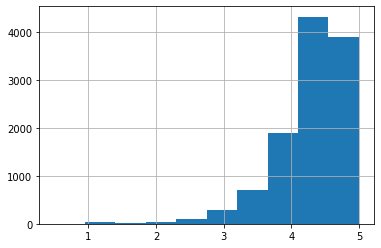

In [ ]:
df['rating'].hist();

In [ ]:
df['locale'].value_counts()

es_ES    6725
es_LA    2432
es_MX    1471
es_CO     435
es_VE     161
es_CL     102
Name: locale, dtype: int64

In [ ]:
df_entrenamiento.corr()

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests
is_practice_test_course,1.000000,-0.067705,-0.101295,0.820798
rating,-0.067705,1.000000,0.102981,-0.042436
num_published_lectures,-0.101295,0.102981,1.000000,-0.071914
num_published_practice_tests,0.820798,-0.042436,-0.071914,1.000000


In [ ]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11087 entries, 1 to 11087
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         11087 non-null  object 
 1   headline                      11086 non-null  object 
 2   is_practice_test_course       11087 non-null  bool   
 3   bestseller                    11087 non-null  object 
 4   captions                      9142 non-null   object 
 5   rating                        11087 non-null  float64
 6   num_published_lectures        11087 non-null  int64  
 7   num_published_practice_tests  11087 non-null  int64  
 8   locale                        11087 non-null  object 
 9   created_date                  11087 non-null  object 
 10  instructional_level_simple    11082 non-null  object 
 11  published_date                11087 non-null  object 
 12  last_update_date              9805 non-null   object 
 13  c

# Limpieza y transformación de datos (magia parte 2 -- MD)

In [ ]:
df['instructional_level_simple'].value_counts()


Todos los niveles    5233
Principiante         3830
Intermedio           1863
Experto               395
Name: instructional_level_simple, dtype: int64

In [ ]:
columnas = ['is_practice_test_course', 'rating', 'num_published_lectures', 'num_published_practice_tests', 'bestseller']
df = df[columnas]

# Territorio de Aprendizaje Automático
Se mira y no se toca

In [ ]:
# Datos para probar
X = df_entrenamiento[df_entrenamiento.columns.drop('bestseller')]
y = df_entrenamiento['bestseller']

# Creamos el objeto del modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

scores = []
kf = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

    # Entrenamos el modelo
    clf.fit(X_train, y_train)

    # Predecimos
    y_pred = clf.predict(X_test)

    # Medimos la performance de la predicción
    score = sk.metrics.accuracy_score(y_test, y_pred)
    print(score)
    scores.append(score)

print(np.mean(scores), np.std(scores))

In [ ]:
# Datos a predecir 
X_prueba = df_prueba[df_prueba.columns.drop('bestseller')]

# Entrenamos el modelo con todos los datos
## binning entropia / WoE --> X, y
clf.fit(X, y)

# Predecimos
df_prueba['bestseller'] = clf.predict(X_prueba)

# Grabamos
df_prueba['bestseller'].to_csv('/content/solucion.csv')